In [1]:
import numpy as np
import matplotlib.pyplot as plt

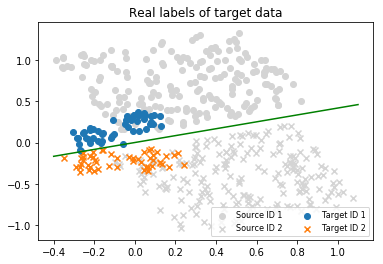

In [2]:
np.random.seed(1)
classifier_weight = np.random.random(1)

margin = 0.1
positive_data = np.random.random([200,2])
positive_data[:,0] -= 1+margin
negative_data = np.random.random([200,2])
negative_data[:,0] += margin
negative_data[:,1] -= 0.2

theta = np.arctan(1/classifier_weight)
rot_mat = np.asarray([[np.cos(theta), -np.sin(theta)],
                     [np.sin(theta), np.cos(theta)]]).reshape([2,2])
positive_data = np.matmul(positive_data,rot_mat)
negative_data = np.matmul(negative_data,rot_mat)

num_tgt_data = 50
scale = 0.25

tgt_data_tem_a = np.random.random([num_tgt_data//2,2])*scale
tgt_data_tem_a[:,0] -= scale+margin
tgt_data_tem_b = np.random.random([num_tgt_data//2,2])*scale
tgt_data_tem_b[:,0] -= scale
tgt_data_tem_b[:,1] -= 0.3
tgt_positive_data = np.concatenate([tgt_data_tem_a, tgt_data_tem_b])
tgt_positive_data = np.matmul(tgt_positive_data,rot_mat)

tgt_data_tem_a = np.random.random([num_tgt_data//2,2])*scale
tgt_data_tem_a[:,0] += margin
tgt_data_tem_a[:,1] -= 0.1
tgt_data_tem_b = np.random.random([num_tgt_data//2,2])*scale
tgt_data_tem_b[:,1] -= 0.4
tgt_negative_data = np.concatenate([tgt_data_tem_a, tgt_data_tem_b])
tgt_negative_data = np.matmul(tgt_negative_data,rot_mat)

positive_plt = plt.scatter(positive_data[:,0],positive_data[:,1],
                           color='#d4d4d4',marker='o',linestyle='None')
negative_plt = plt.scatter(negative_data[:,0],negative_data[:,1],
                           color='#d4d4d4',marker='x',linestyle='None')
tgt_positive_plt = plt.scatter(tgt_positive_data[:,0],tgt_positive_data[:,1],marker='o')
tgt_negative_plt = plt.scatter(tgt_negative_data[:,0],tgt_negative_data[:,1],marker='x')

x_line = np.asarray(range(16))/10-0.4
y_line = x_line * classifier_weight
plt.plot(x_line,y_line,'g-')

plt.legend(
    (positive_plt, negative_plt, tgt_positive_plt, tgt_negative_plt),
    ('Source ID 1', 'Source ID 2', 'Target ID 1', 'Target ID 2'),
    loc='lower right',
    ncol=2,
    fontsize=8,
)
title = plt.title('Real labels of target data')
# axis_range = plt.axis('off')
# plt.savefig('real.pdf',format='pdf')

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Computing source distance...
Computing original distance...
Starting re_ranking...


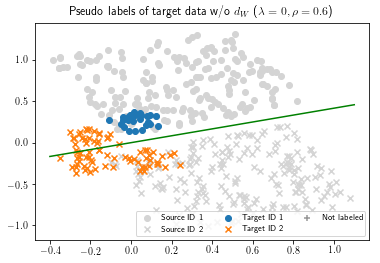

In [3]:
from reid.rerank import re_ranking
from sklearn.cluster import DBSCAN
plt.rc('text', usetex=True)

source_features = np.concatenate([positive_data,negative_data])
target_features = np.concatenate([tgt_positive_data,tgt_negative_data])
rerank_dist = re_ranking(
    source_features, target_features, 
    lambda_value=0, # no d_w
) 

tri_mat = np.triu(rerank_dist, 1) # tri_mat.dim=2
tri_mat = tri_mat[np.nonzero(tri_mat)] # tri_mat.dim=1
tri_mat = np.sort(tri_mat,axis=None)
top_num = np.round(0.6*tri_mat.size).astype(int)
eps = tri_mat[:top_num].mean()
cluster = DBSCAN(eps=eps, min_samples=4, metric='precomputed', n_jobs=8)
labels = cluster.fit_predict(rerank_dist)

if np.max(labels) > 1:
    raise(RuntimeError("More than 2 clusters"))
pseudo_positive = target_features[labels == 0,:]
pseudo_negative = target_features[labels == 1,:]
pseudo_no_labeled = target_features[labels == -1,:]

positive_plt = plt.scatter(positive_data[:,0],positive_data[:,1],
                           color='#d4d4d4',marker='o',linestyle='None')
negative_plt = plt.scatter(negative_data[:,0],negative_data[:,1],
                           color='#d4d4d4',marker='x',linestyle='None')
pseudo_positive = plt.scatter(pseudo_positive[:,0],pseudo_positive[:,1],marker='o')
pseudo_negative = plt.scatter(pseudo_negative[:,0],pseudo_negative[:,1],marker='x')
pseudo_no_labeled = plt.scatter(pseudo_no_labeled[:,0],pseudo_no_labeled[:,1],
                                color='#969696', marker='+')

x_line = np.asarray(range(16))/10-0.4
y_line = x_line * classifier_weight
plt.plot(x_line,y_line,'g-')

plt.legend(
    (positive_plt, negative_plt, pseudo_positive, pseudo_negative, pseudo_no_labeled),
    ('Source ID 1', 'Source ID 2', 'Target ID 1', 'Target ID 2', 'Not labeled'),
    loc='lower right',
    ncol=3,
    fontsize=8,
)
title = plt.title(r'Pseudo labels of target data w/o $d_{W}$ ($\lambda=0, \rho=0.6$)')
# axis_range = plt.axis('off')
# plt.savefig('no_dw.pdf',format='pdf')

Computing source distance...
Computing original distance...
Starting re_ranking...


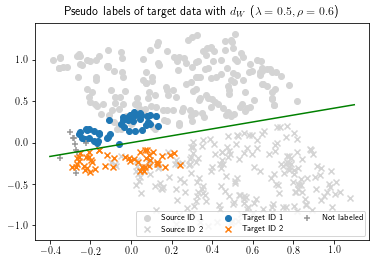

In [4]:
rerank_dist = re_ranking(
    source_features, target_features, 
    lambda_value=0.5, # with d_w
) 

tri_mat = np.triu(rerank_dist, 1) # tri_mat.dim=2
tri_mat = tri_mat[np.nonzero(tri_mat)] # tri_mat.dim=1
tri_mat = np.sort(tri_mat,axis=None)
top_num = np.round(0.6*tri_mat.size).astype(int)
eps = tri_mat[:top_num].mean()
cluster = DBSCAN(eps=eps, min_samples=4, metric='precomputed', n_jobs=8)
labels = cluster.fit_predict(rerank_dist)

if np.max(labels) > 1:
    raise(RuntimeError("More than 2 clusters"))
pseudo_positive = target_features[labels == 0,:]
pseudo_negative = target_features[labels == 1,:]
pseudo_no_labeled = target_features[labels == -1,:]

positive_plt = plt.scatter(positive_data[:,0],positive_data[:,1],
                           color='#d4d4d4',marker='o',linestyle='None')
negative_plt = plt.scatter(negative_data[:,0],negative_data[:,1],
                           color='#d4d4d4',marker='x',linestyle='None')
pseudo_positive = plt.scatter(pseudo_positive[:,0],pseudo_positive[:,1],marker='o')
pseudo_negative = plt.scatter(pseudo_negative[:,0],pseudo_negative[:,1],marker='x')
pseudo_no_labeled = plt.scatter(pseudo_no_labeled[:,0],pseudo_no_labeled[:,1],
                                color='#969696', marker='+')

x_line = np.asarray(range(16))/10-0.4
y_line = x_line * classifier_weight
plt.plot(x_line,y_line,'g-')

plt.legend(
    (positive_plt, negative_plt, pseudo_positive, pseudo_negative, pseudo_no_labeled),
    ('Source ID 1', 'Source ID 2', 'Target ID 1', 'Target ID 2', 'Not labeled'),
    loc='lower right',
    ncol=3,
    fontsize=8,
)
title = plt.title(r'Pseudo labels of target data with $d_W$ ($\lambda=0.5, \rho=0.6$)')
# axis_range = plt.axis('off')
# plt.savefig('with_dw.pdf',format='pdf')